<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="https://www.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/all/themes/theme537/images/unicamp.png" width="100px" style="display: inline-block; margin-top: 5px;"></a>
<a href="https://www.fee.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/default/files/imagens/logo_feec_50anos_juntos.png" width="150px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>

## IE325Z - Introdução à Confiabilidade de Materiais e Dispositivos
## Lista 1 - Exercício 1

<br>

|Alunos   	|RA   	|e-mail   	|
|:-:	|:-:	|:-:	|
|Patricia Henriques Nallin  	|103717   	|patricia.nallin@gmail.com   	| 
|Mauricio Martins Donatti  	|092374   	|mmdonatti@gmail.com   	| 



|Professor     	|e-mail   	|
|:-:	|:-:	|
|Prof. Roberto Lacerda de Orio | orio@dsif.fee.unicamp.br |

<!-- Exemplo de Warning
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**WARNING**</p>

<p>Don't rely on this server for anything you want to last - your server will be *deleted after 10 minutes of inactivity*.</p>
</div>
-->
<!-- Exemplo de Link
Your server is hosted thanks to [Rackspace](http://bit.ly/tmpnbdevrax), on their on-demand bare metal servers, [OnMetal](http://bit.ly/onmetal).
-->

### Instruções de Uso

Para rodar um trecho de código:

1. Clique para selecionar a célula
2. Aperte `SHIFT+ENTER` no teclado ou clique no botão (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) na barra superior da página.

### Enunciado
<br>
<div style="text-align: justify">A tensão de limiar $V_T$ de um transistor MOS degrada com o tempo conforme a tabela abaixo.</div>

|Tempo (h)|$V_T$ (V)|
|:-:|:-:|
|0|0,40|
|1|0,42|
|10|0,44|
|100|0,48|

<div style="text-align: justify">a) Determine a lei de potência que melhor se ajusta aos dados.
<br>
b) Qual o valor esperado para $V_T$ após 1000 h?</div>

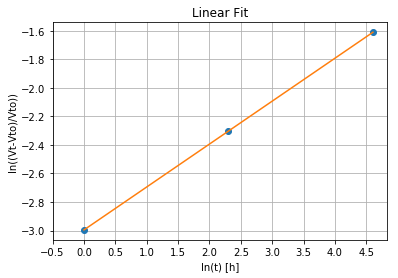

Linear Fit Variables - Power Law: 
a (slope coef) = 0.301029995664
b (intercept coef) = -2.99573227355
r_value (correlation coefficient) = 1.0
std_err (standard error) = 6.34373281224e-09



In [4]:
import matplotlib.pyplot as plt
import notebook_importer
import numpy as np
from modules import IE325

# LEI DE POTENCIA
# S = So(1+Ao.tˆn)
# 

# Linearizacao
# ln((S-So)/So) = ln(Ao) + m.ln(t)
# y = b + a.x


# ----- Dados
tempo_h = [0, 1, 10, 100]
vt = [0.40, 0.42, 0.44, 0.48]

PL = IE325.PowerLaw(tempo_h, vt)

# ----- Dados linearizados
xlin, ylin = PL.LinearData()


# ----- Plot    
plt.plot(xlin,ylin,'o', xlin, PL.LinearFit())
plt.title('Linear Fit')
plt.xlabel('ln(t) [h]')
plt.ylabel('ln((Vt-Vto)/Vto))')
ax1 = plt.gca()
ax1.set_xticks(np.arange(-0.5, 5, 0.5))
#ax1.set_yticks(np.arange(-3.1, -1.5, 0.2))
plt.grid()
#fig = plt.gcf()
plt.show() 

#Variaveis do linear fit
print(PL.Variables())

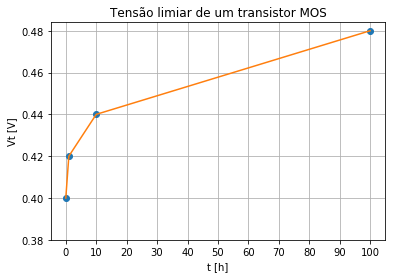

Equação de regimento:
Vt(t) =0.4 * (1 + 5.000e-02 * t^3.010e-01)
Vt(t) =0.4 + 2.000e-02 * t^3.010e-01


In [5]:
# --------------------------------------------------------
# SERIE ORIGINAL DE DADOS
# --------------------------------------------------------

plt.plot(tempo_h,vt,'o', tempo_h, PL.ExpandedData(tempo_h))
plt.title('Tensão limiar de um transistor MOS')
plt.xlabel('t [h]')
plt.ylabel('Vt [V]')
ax2 = plt.gca()
ax2.set_xticks(np.arange(0, 110, 10))
ax2.set_yticks(np.arange(0.38, 0.50, 0.02))
plt.grid()
fig = plt.gcf()
plt.show()



print("Equação de regimento:")
print("Vt(t) =" + PL.LawComplete(decimal = 3))
print("Vt(t) =" + PL.LawSimple(decimal = 3))


In [6]:
# --------------------------------------------------
# ----- Vt do transistor para tempo de 1000h ? -----

print("Para um tempo de 1000h, seguindo a equação acima, o Vt do transistor \
será de aproximadamente " + str(PL.Find_S(1000)) + "V.")

Para um tempo de 1000h, seguindo a equação acima, o Vt do transistor será de aproximadamente 0.56V.
